# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

### Importing Libraries

In [1]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [2]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [3]:
df = pd.read_csv("TSLA.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-20,303.802002,330.000000,297.600006,328.600006,328.600006,85607000
1,2020-07-21,327.985992,335.000000,311.600006,313.671997,313.671997,80536000
2,2020-07-22,319.799988,325.283997,312.399994,318.466003,318.466003,70805500
3,2020-07-23,335.790009,337.799988,296.153992,302.614014,302.614014,121642500
4,2020-07-24,283.201996,293.000000,273.308014,283.399994,283.399994,96983000
...,...,...,...,...,...,...,...
247,2021-07-13,686.320007,693.280029,666.299988,668.539978,668.539978,20966100
248,2021-07-14,670.750000,678.609985,652.840027,653.380005,653.380005,21641200
249,2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600
250,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,582.984477,596.192690,568.077294,583.079547,583.079547,4.411546e+07
std,159.113803,160.870946,156.460757,158.857279,158.857279,2.691527e+07
min,279.200012,284.000000,273.000000,274.877991,274.877991,1.515770e+07
25%,430.497498,437.782509,420.377502,425.887512,425.887512,2.602208e+07
50%,614.190002,627.795013,599.945007,618.200012,618.200012,3.491190e+07
75%,687.247498,701.087509,670.385010,685.100021,685.100021,5.155318e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


### Visualizing the historical performance of Tesla using plotly express

In [7]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [8]:
px.area(df, x="Date", y="Close") #closing price for one year

In [9]:
px.area(df, x="Date", y="Volume") #volume of stocks traded each day

In [10]:
px.bar(df, y="Volume")#volume of stocks traded each day

In [11]:
px.box(df, y="Close") #for statistical analysis



## Understanding Facebook Prophet

### Data Preperation

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-20,303.802002,330.000000,297.600006,328.600006,328.600006,85607000
1,2020-07-21,327.985992,335.000000,311.600006,313.671997,313.671997,80536000
2,2020-07-22,319.799988,325.283997,312.399994,318.466003,318.466003,70805500
3,2020-07-23,335.790009,337.799988,296.153992,302.614014,302.614014,121642500
4,2020-07-24,283.201996,293.000000,273.308014,283.399994,283.399994,96983000
...,...,...,...,...,...,...,...
247,2021-07-13,686.320007,693.280029,666.299988,668.539978,668.539978,20966100
248,2021-07-14,670.750000,678.609985,652.840027,653.380005,653.380005,21641200
249,2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600
250,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800


In [13]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns = columns)  #new data frame with date and closing price only

In [14]:
ndf

,Date,Close
0,2020-07-20,328.600006
1,2020-07-21,313.671997
2,2020-07-22,318.466003
3,2020-07-23,302.614014
4,2020-07-24,283.399994
...,...,...
247,2021-07-13,668.539978
248,2021-07-14,653.380005
249,2021-07-15,650.599976
250,2021-07-16,644.219971


In [15]:
prophet_df = ndf.rename(columns = {'Date' : 'ds', 'Close' : 'y'}) #renaming 'Date' as 'ds' and 'Close' as 'y'

In [16]:
prophet_df

,ds,y
0,2020-07-20,328.600006
1,2020-07-21,313.671997
2,2020-07-22,318.466003
3,2020-07-23,302.614014
4,2020-07-24,283.399994
...,...,...
247,2021-07-13,668.539978
248,2021-07-14,653.380005
249,2021-07-15,650.599976
250,2021-07-16,644.219971


### Creating Facebook Prophet Model

In [17]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting for next 30 Days



In [18]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-20,305.368700,231.458784,368.357942,305.368700,305.368700,-5.747142,-5.747142,-5.747142,-5.747142,-5.747142,-5.747142,0.0,0.0,0.0,299.621558
1,2020-07-21,306.992663,234.267111,376.473762,306.992663,306.992663,-3.092493,-3.092493,-3.092493,-3.092493,-3.092493,-3.092493,0.0,0.0,0.0,303.900170
2,2020-07-22,308.616627,239.171237,376.022117,308.616627,308.616627,-4.448625,-4.448625,-4.448625,-4.448625,-4.448625,-4.448625,0.0,0.0,0.0,304.168002
3,2020-07-23,310.240590,234.954982,374.103119,310.240590,310.240590,-4.546472,-4.546472,-4.546472,-4.546472,-4.546472,-4.546472,0.0,0.0,0.0,305.694119
4,2020-07-24,311.864554,237.605469,376.755212,311.864554,311.864554,-4.196487,-4.196487,-4.196487,-4.196487,-4.196487,-4.196487,0.0,0.0,0.0,307.668067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021-08-14,595.277886,536.696494,676.104586,586.329840,604.088879,11.015609,11.015609,11.015609,11.015609,11.015609,11.015609,0.0,0.0,0.0,606.293495
278,2021-08-15,594.568340,534.346030,675.285543,584.917714,603.866413,11.015609,11.015609,11.015609,11.015609,11.015609,11.015609,0.0,0.0,0.0,605.583949
279,2021-08-16,593.858794,520.113709,658.161600,583.581389,603.822029,-5.747142,-5.747142,-5.747142,-5.747142,-5.747142,-5.747142,0.0,0.0,0.0,588.111652
280,2021-08-17,593.149247,519.491407,656.217282,581.980575,603.778194,-3.092493,-3.092493,-3.092493,-3.092493,-3.092493,-3.092493,0.0,0.0,0.0,590.056754


In [20]:
#here yhat is the predicted stock price

In [21]:
px.line(forecast, x='ds', y = 'yhat')

In [22]:
#seems like stock price will ffollow a downward trend

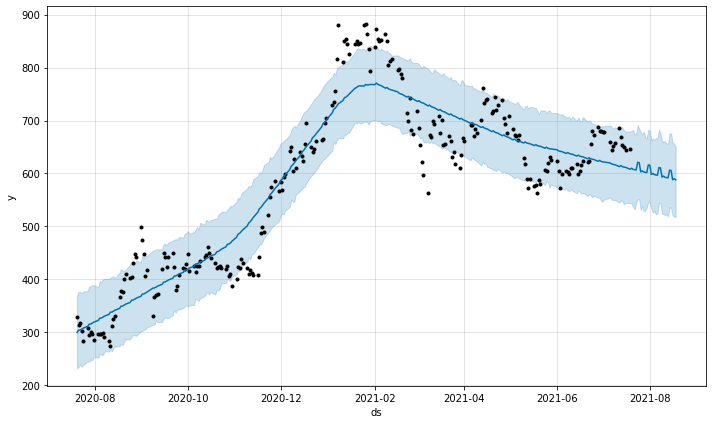

In [23]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

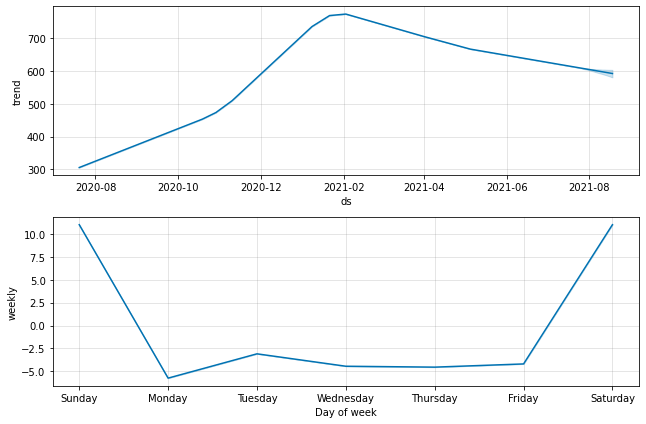

In [24]:
figure2 = m.plot_components(forecast)

### Conclusion : According to the model prediction, Stock price of Tesla will follow a downward trend in next 30 days

##Downloading the Forecast data

In [27]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>